Homework No. 5
Due November 15 (11:00 pm), 2024
(100 points)

Objectives
1.	Apply K-Means clustering algorithm to real data
2.	Analyze and optimize the parameters of the K-Means
3.	Analyze and compare the clustering results.

Problem 1 (100 points)
a)	Use the K-Means algorithm to cluster the provided data. Vary the number of clusters from 5 to 15 and select the optimal number. Justify your choice based on the SSE vs. No. clusters plot.
b)	Using the number of clusters selected in (a), generate the silhouette plot. 
c)	Using the silhouette coefficients, identify 5 samples that are at the core of each cluster and 2 samples that are at the boundary of any two clusters (if they exist). Display the original images associated with these samples and comment on the results.
d)	Compute the adjusted rand index by comparing the generated clusters to the provided ground truth (this should be the only time you use the ground truth). 

Extra credit (30 pts) 
Note: You may downsample the data (maintaining the balance among all classes) if you do not have access to sufficient resources to run the hierarchical on this data.

a)	Use the hierarchical agglomerative algorithm, with the Ward’s method to compute the distance between two clusters, to cluster the provided data. Generate the dendrogram and use that to identify the optimal number of clusters. Justify your choice.
b)	Using the number of clusters selected in (a), generate the silhouette plot.
c)	Repeat (a) and (b) using single-link and complete-link. Compare the silhouette plots of the 3 methods and identify the best distance for this data. Justify your choice.
d)	Using the silhouette coefficients of the best method identified in (c), identify 5 samples that are at the core of each cluster and 2 samples that are at the boundary of any two clusters (if they exist). Display the original images associated with these samples and comment on the results.


CIFAR-10 - revisited


The provided data contain 10K images from 5 classes ['plane','car','bird','horse','ship'] extracted from CIFAR-10 dataset. 

Three files are provided:

 - X: Contains the 128 features extracted from all the provided 10K images. (using a CNN)

 - y: Contains the true labels for each of the 10K images (one label by row): [0:'plane',1:'car',2:'bird',3:'horse',4:'ship'] 

 - images: contain the original images. Each row contains 32*32*3 = 3072 columns corresponding to the scaled pixels intensity (1./255) acros the three RGB channels.
 PS: In order to visualize the image corresponding to a given rowm you should first revert it to its original shape (32,32,3).
 Example: To visualize the first image (row 0), you can use: plt.imshow(images[0].reshape(32,32,3))



NB: the index order is respected in each of the three files: X[0] contain the the features extracted from images[0] whose label is y[0]


In [1]:
import pandas as pd
import numpy as np

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

Pandas version: 2.2.3
NumPy version: 1.24.0


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('Features/X.csv')

In [4]:
print("First 5 rows of X.csv:")
print(X.head())

print("\nShape of X.csv:")
print(X.shape)

First 5 rows of X.csv:
   0.46346056  9.042592   10.85815       0.0  5.690516  0.0.1  0.0.2  \
0    0.000000  3.272389   7.198232  0.000000  0.000000    0.0    0.0   
1    0.000000  0.632320   3.815153  0.000000  6.290697    0.0    0.0   
2    4.122074  1.916136  15.258545  0.000000  0.000000    0.0    0.0   
3    0.000000  0.000000   3.467616  3.487184  0.000000    0.0    0.0   
4    0.000000  0.000000   3.050006  1.275129  9.635914    0.0    0.0   

   7.2261753     0.0.3  7.672988  ...  0.0.63    0.0.64   16.03831  0.0.65  \
0   3.866530  0.000000  1.638428  ...     0.0  0.000000  13.797885     0.0   
1   8.492423  5.379466  2.708441  ...     0.0  5.192078   4.009046     0.0   
2   3.151645  0.000000  4.893418  ...     0.0  0.532675   7.789596     0.0   
3   0.000000  8.399324  7.640605  ...     0.0  8.419696   0.000000     0.0   
4   0.857433  5.551315  1.438167  ...     0.0  2.291796   9.811793     0.0   

   0.0.66    0.0.67    0.0.68  0.0.69     0.0.70    0.0.71  
0     0.0  2.3

In [5]:
y = pd.read_csv('Features/y.csv').values.ravel()

In [6]:
print("First 5 rows of y.csv:")
print(y[:5])

print("\nShape of y.csv:")
print(y.shape)

First 5 rows of y.csv:
[3 0 3 4 0]

Shape of y.csv:
(9999,)


In [9]:
sse = []
for k in range(5, 16):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

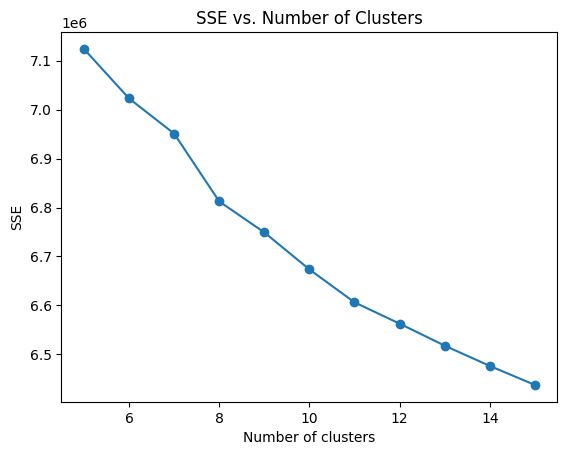

In [10]:
plt.plot(range(5, 16), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE vs. Number of Clusters')
plt.show()